# 3.5 カーネルSVMを使った非線形問題の求解

## 3.5.1 カーネルトリックをつかって分離超平面を高次元空間で特定する

- カーネルSVMのγ（ガンマ）パラメタがキモ。
    - トレーニングデータへ非常に良く適合する。逆に言うと未知のデータでは汎化誤差が生じやすい
    
    
扱いが難しいという理解。

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
""" iris dataset の用意 """
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

sc = StandardScaler()

#　トレーニングデータの平均と標準偏差を計算

sc.fit(X_train)

# 平均、標準偏差を用いて標準化

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

""" トレーニングデータとテストデータの特徴量を行方向に結合
"""
X_combined_std = np.vstack((X_train_std, X_test_std))

""" トレーニングデータとテストデータのクラスラベルの結合
"""
y_combined = np.hstack((y_train, y_test))

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_reqions(X, y, classifier, test_idx=None, resolusion=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolusion),
        np.arange(x2_min, x2_max, resolusion)
    )
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contour(xx1, xx2, z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    
    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl
        )
    # テストサンプルを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            x=X_test[:, 0], 
            y=X_test[:, 1], 
            c="gray", alpha=1.0, 
            linewidths=.1, marker='.', s=55, label='test set'
        )

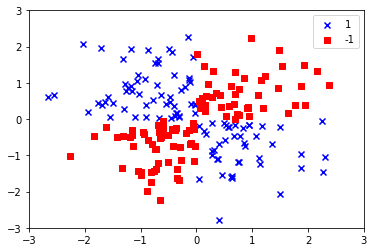

In [11]:
# 乱数を指定
np.random.seed(0)

# 標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200, 2)

# 2つの引数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

# 排他的論理和の値が真の場合は1，偽の場合は-1の場合は-1を割り当てる
y_xor = np.where(y_xor, 1, -1)

# ラベル1を青のｘでプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor ==1, 1], c='b', marker='x', label='1')

# ラベル-1を赤の■でプロット
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

# 軸の範囲を指定
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

# ランダムなノイズを含んだXORデータ・セットが描画される

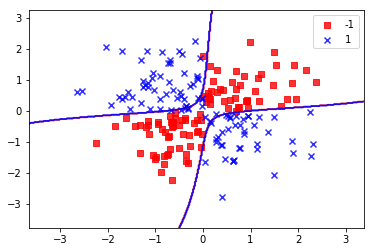

In [12]:
from sklearn.svm import SVC

# RBFカーネルによるSVMインスタンスの生成
svm = SVC(kernel="rbf", random_state=0, gamma=0.1, C=10.0)

svm.fit(X_xor, y_xor)
plot_decision_reqions(X_xor, y_xor, classifier=svm)
plt.legend(loc="best")
plt.show()

In [13]:
"""
γ(gamma)パラメタ: カットオフパラメタ。値を小さくするとトレーニングデータ・セットの影響力が小さくなる。
→ 決定境界が滑らかに。
"""

'\nγ(gamma)パラメタ: カットオフパラメタ。値を小さくするとトレーニングデータ・セットの影響力が小さくなる。\n→ 決定境界が滑らかに。\n'

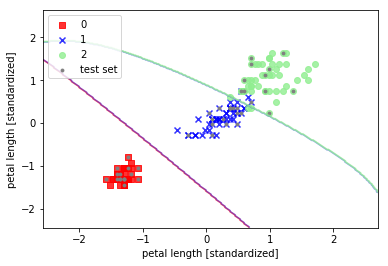

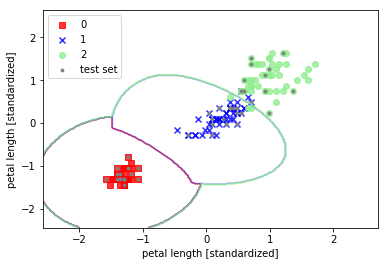

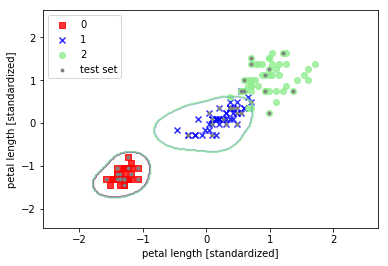

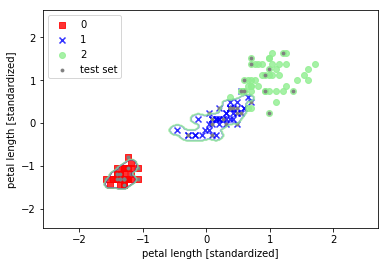

In [18]:
for _gamma in [0.2, 1, 10, 100]:
    svm = SVC(kernel="rbf", random_state=0, gamma=_gamma, C=1.0)
    svm.fit(X_train_std, y_train)

    plot_decision_reqions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
    plt.xlabel("petal length [standardized]")
    plt.ylabel("petal length [standardized]")
    plt.legend(loc="upper left")
    plt.show()